In [1]:
import os
import random
import numpy as np
import skimage.io as io
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline

from func.tool import get_fname
from func.plot import plt_result

In [2]:
TESRIDIR = 'data/ori/tesri/'
SUPDIR   = 'model/Unet_rmbg/BRCAS2TESRI/Predict_mask/'
UNSUPDIR = 'model/Unsup_rmbg/result_sample/predict_mask/'
UNSUP2SUPDIR = 'data/processed/finalstep/mask_unsup2sup_cntr/'
_CRF = 'data/processed/finalstep/mask_unsup2sup_crf/'
_CV2 = 'data/processed/finalstep/mask_unsup2sup_crf_cntr/'

BODY = 'data/processed/finaluse/A_rmbg_01_Body/'
LF   = 'data/processed/finaluse/A_rmbg_02_Left_fore/'
RF   = 'data/processed/finaluse/A_rmbg_03_Right_fore/'
LH   = 'data/processed/finaluse/A_rmbg_04_Left_hind/'
RH   = 'data/processed/finaluse/A_rmbg_05_Right_hind/'

In [3]:
target_name = os.listdir(TESRIDIR)
random.shuffle(target_name)
sample_name = target_name[0:10]
# sample_name = target_name
sample_name = [get_fname(name) for name in sample_name]
ori_path       = [os.path.join(TESRIDIR,     name+'.jpg') for name in sample_name]
sup_path       = [os.path.join(SUPDIR,       name+'.png') for name in sample_name]
unsup_path     = [os.path.join(UNSUPDIR,     name+'.png') for name in sample_name]
unsup2sup_path = [os.path.join(UNSUP2SUPDIR, name+'.png') for name in sample_name]
_crf_path      = [os.path.join(_CRF,         name+'.png') for name in sample_name]
_cv2_path      = [os.path.join(_CV2,         name+'.png') for name in sample_name]

body_path       = [os.path.join(BODY,       name+'.png') for name in sample_name]
lf_path       = [os.path.join(LF,       name+'.png') for name in sample_name]
rf_path       = [os.path.join(RF,       name+'.png') for name in sample_name]
lh_path       = [os.path.join(LH,       name+'.png') for name in sample_name]
rh_path       = [os.path.join(RH,       name+'.png') for name in sample_name]

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


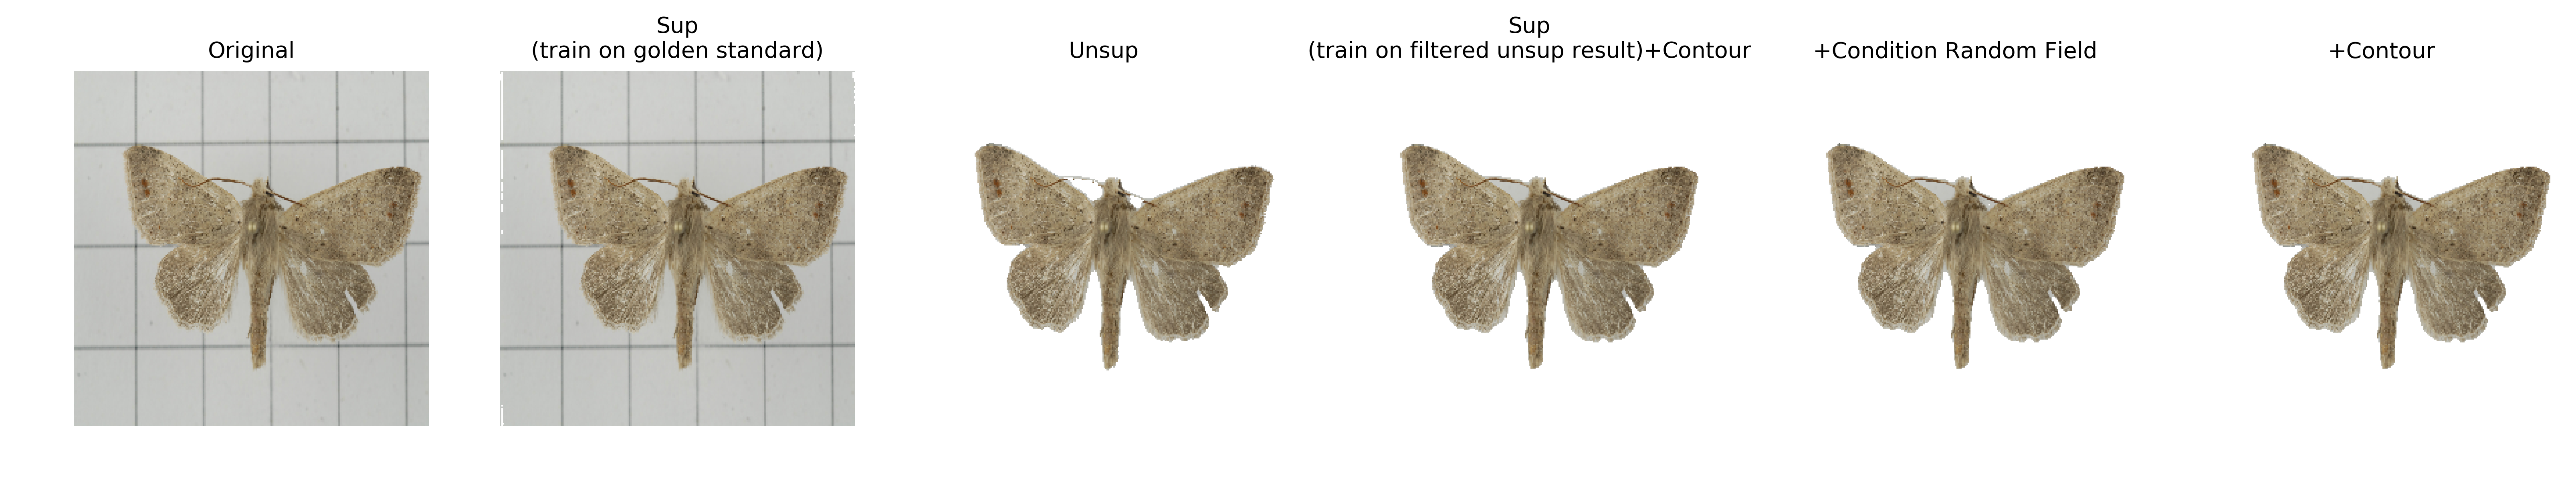

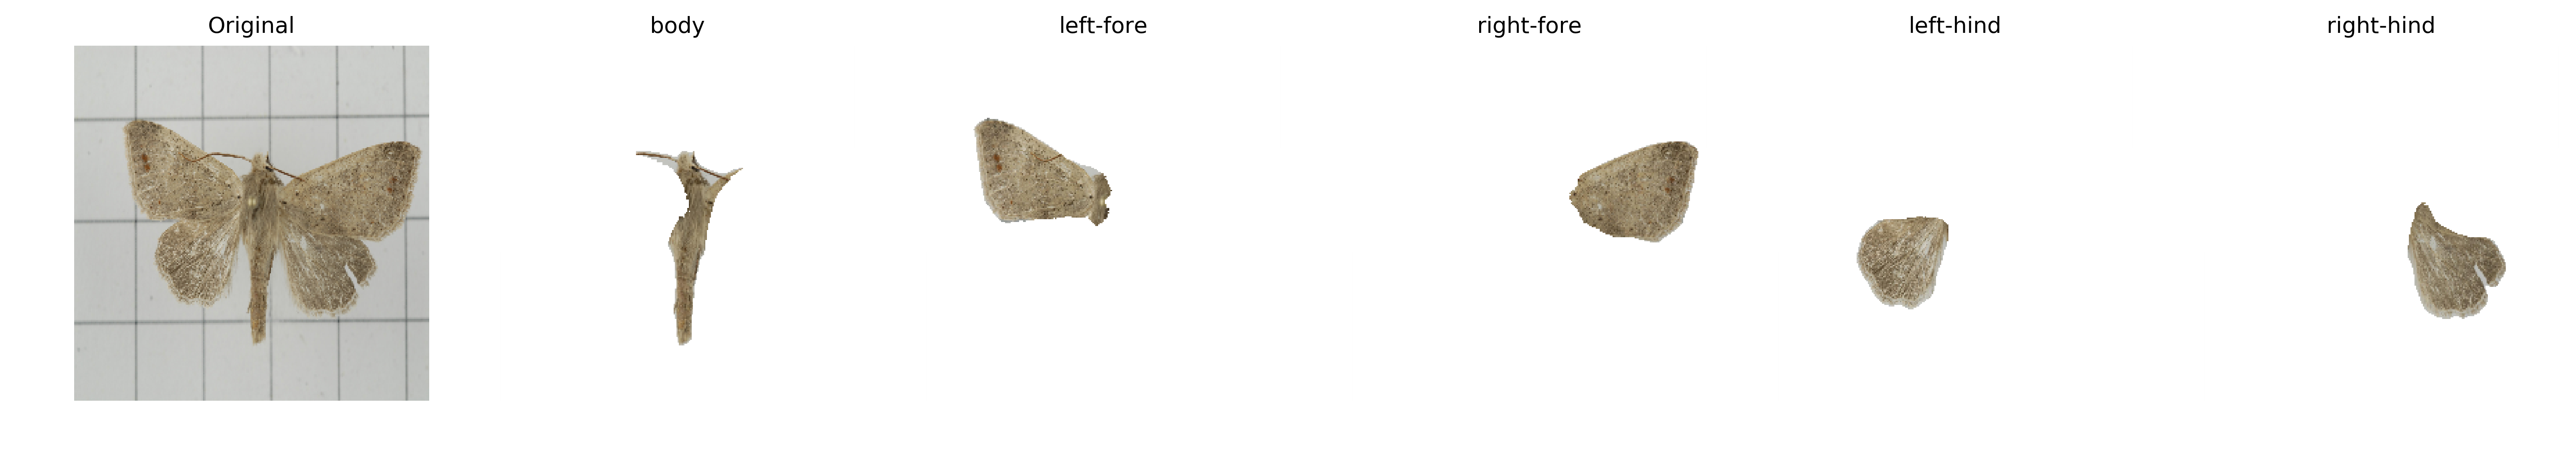

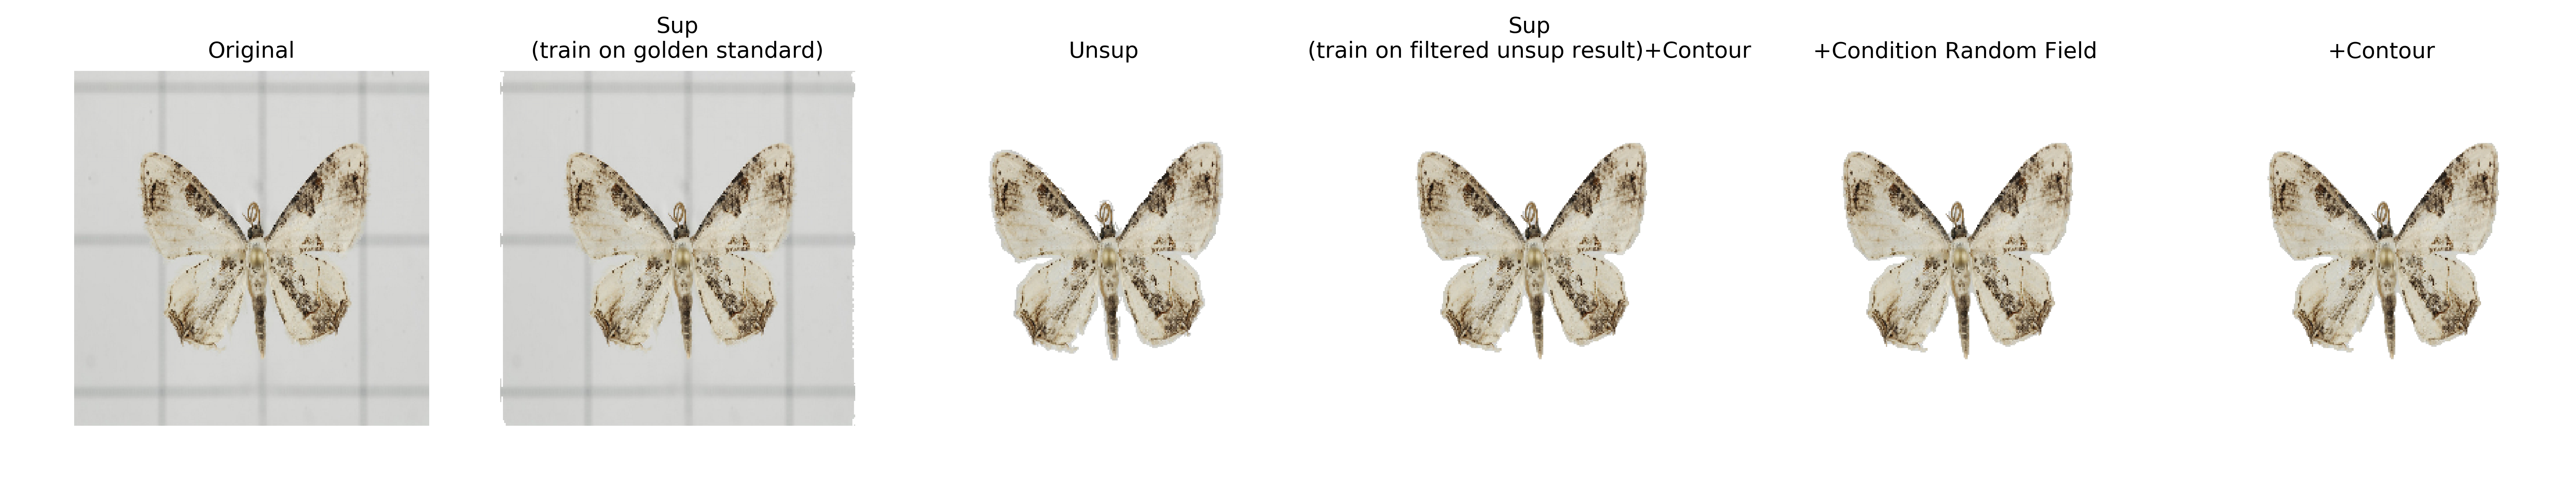

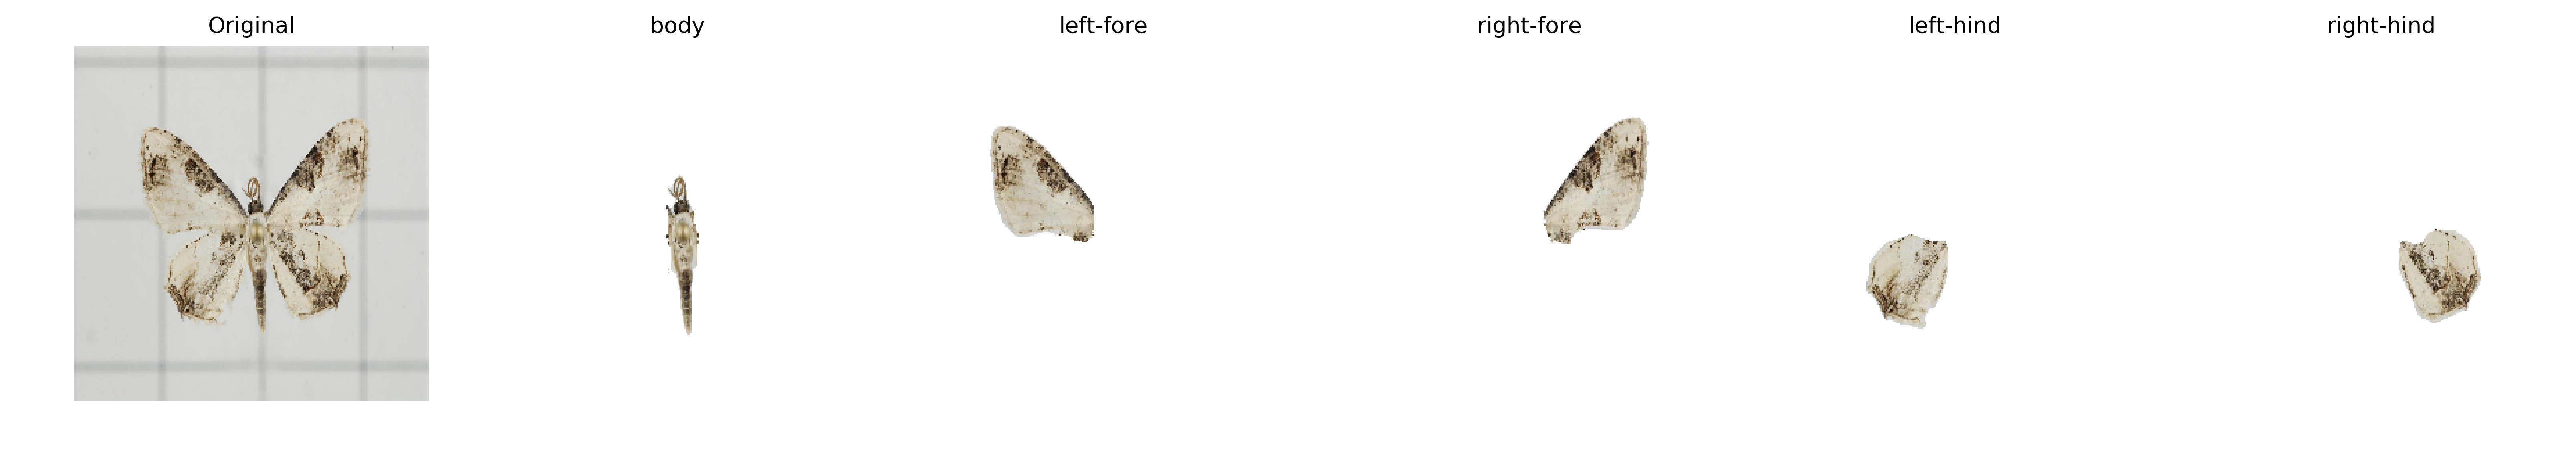

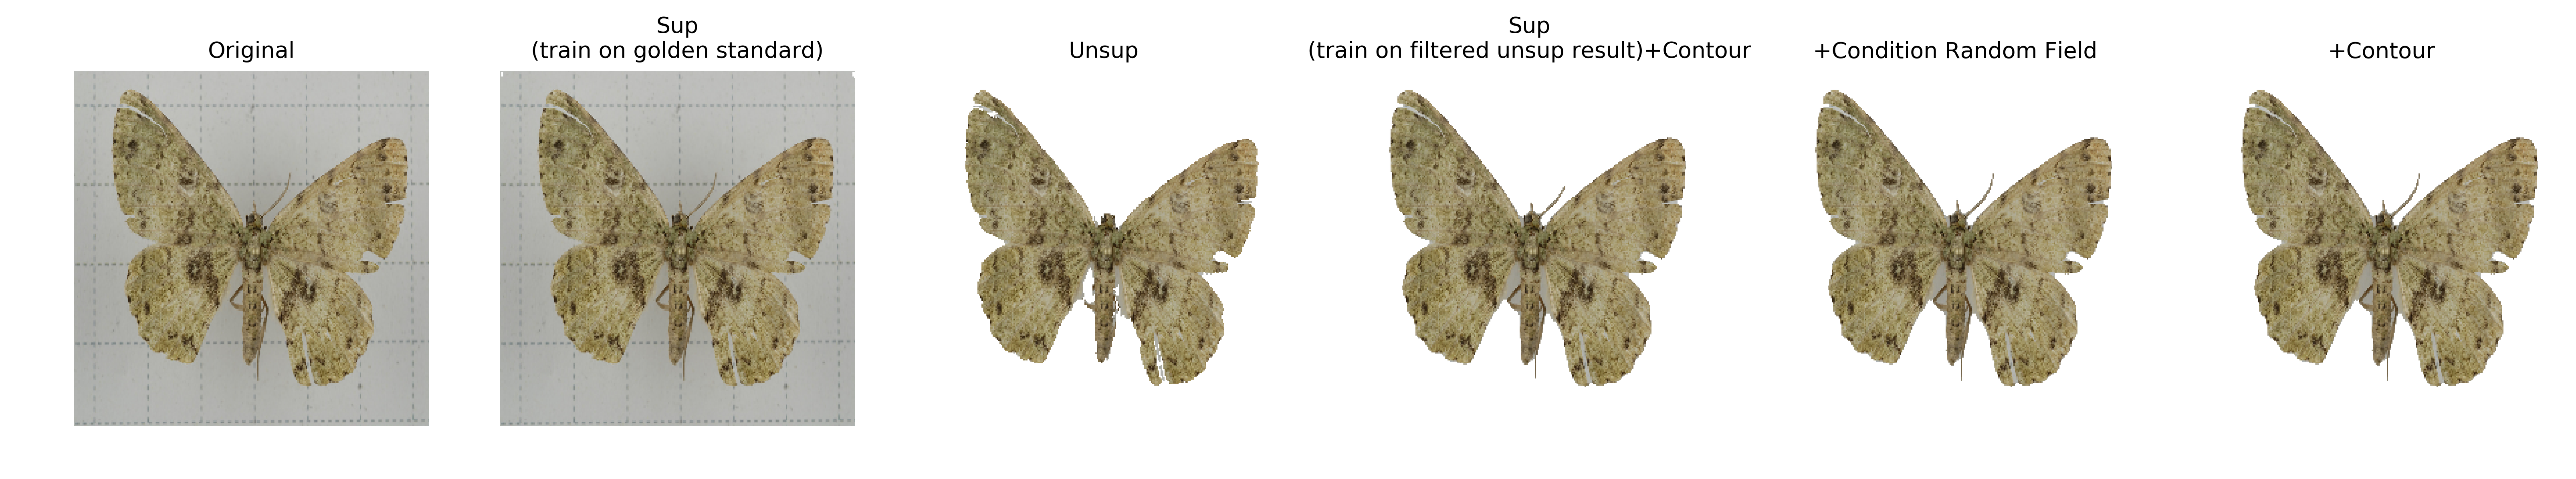

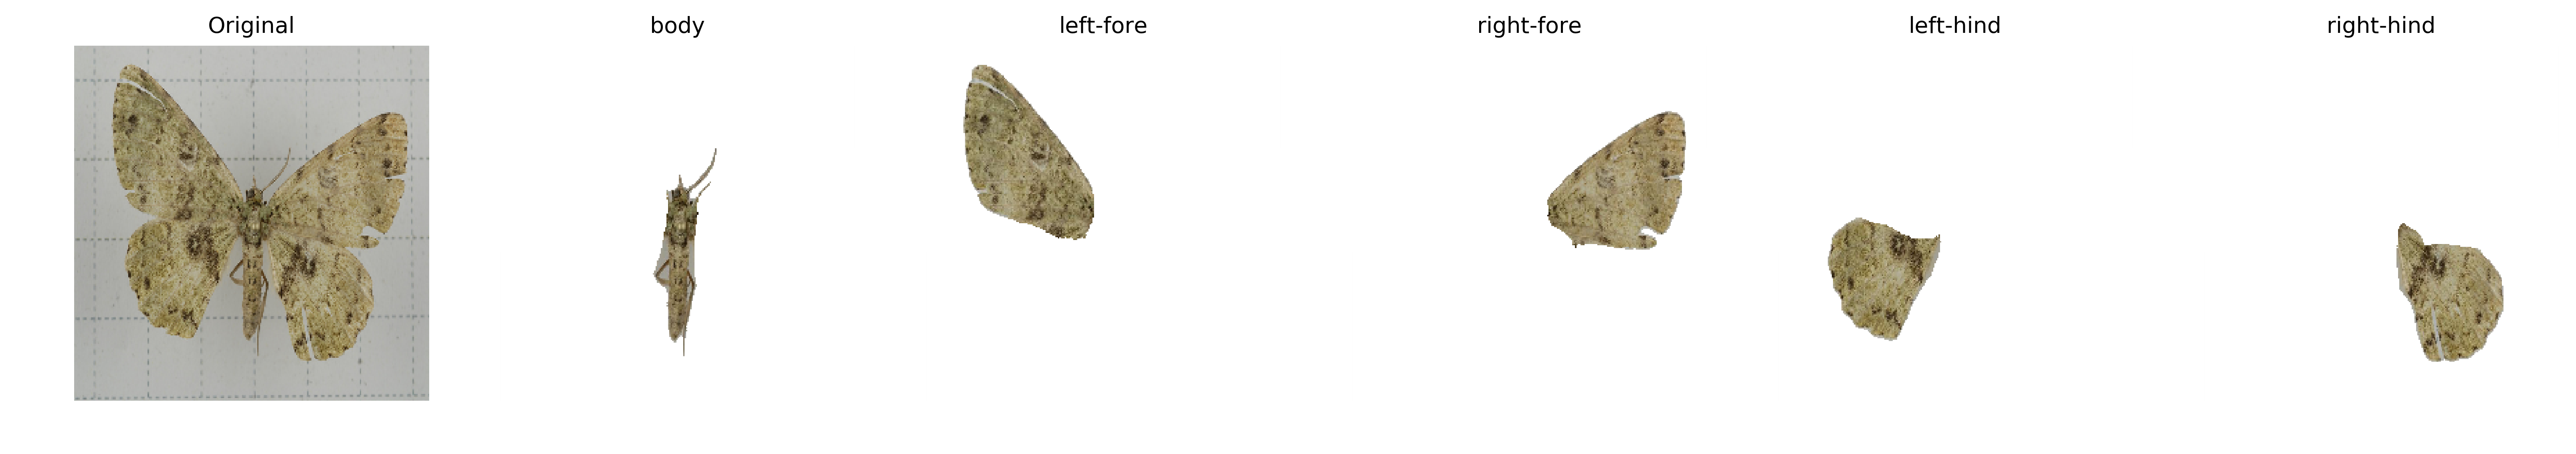

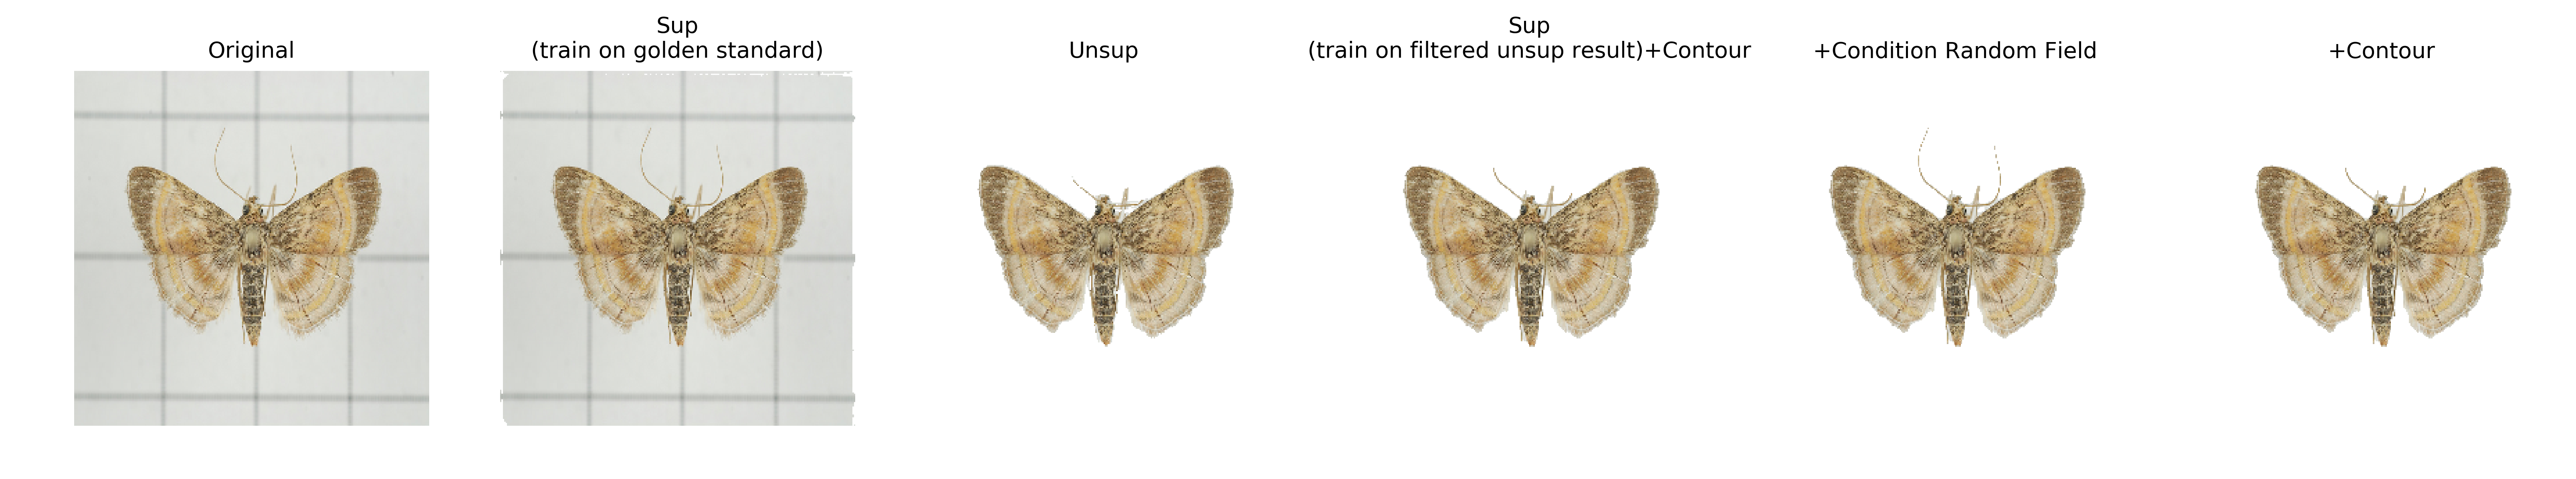

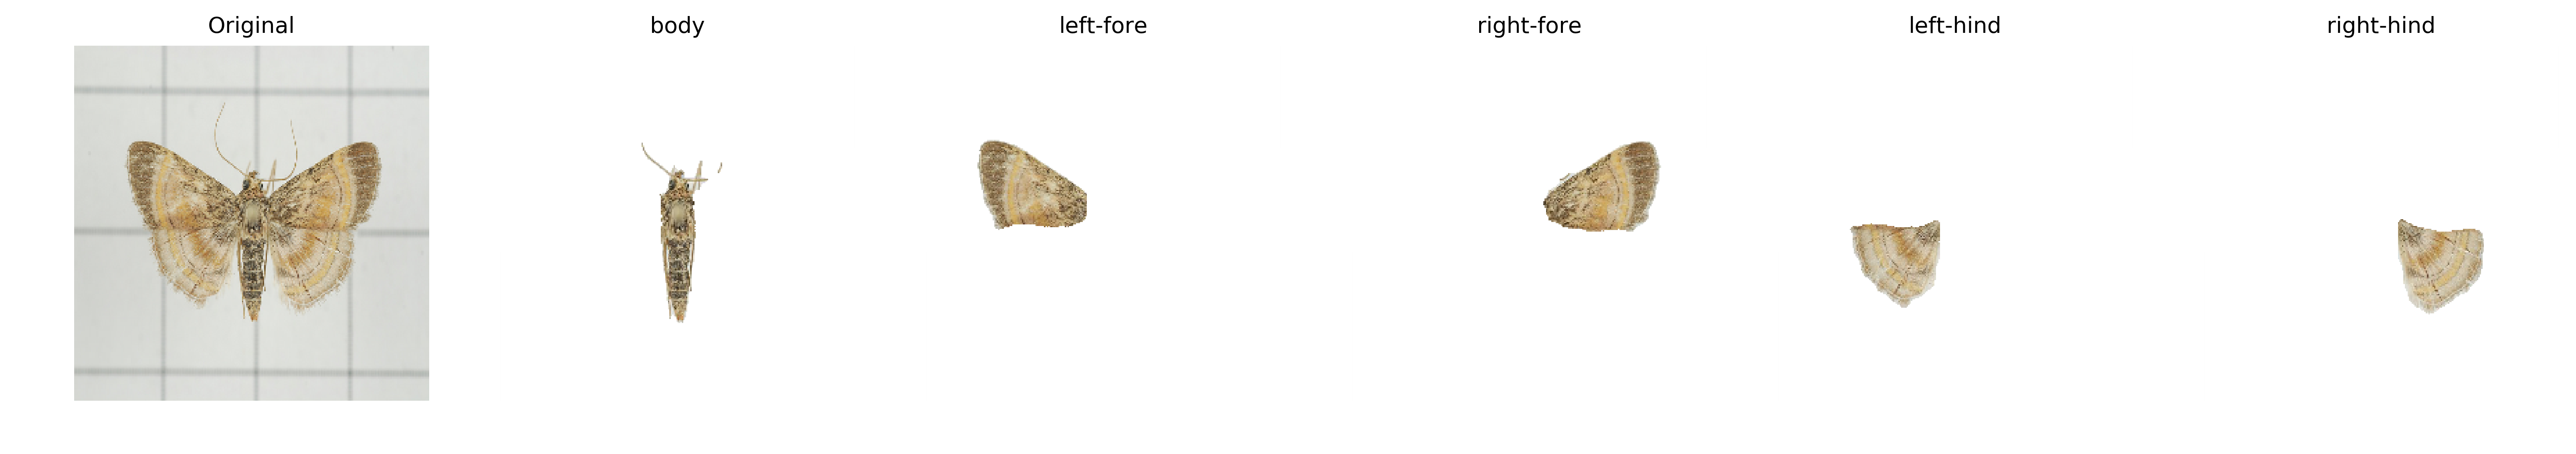

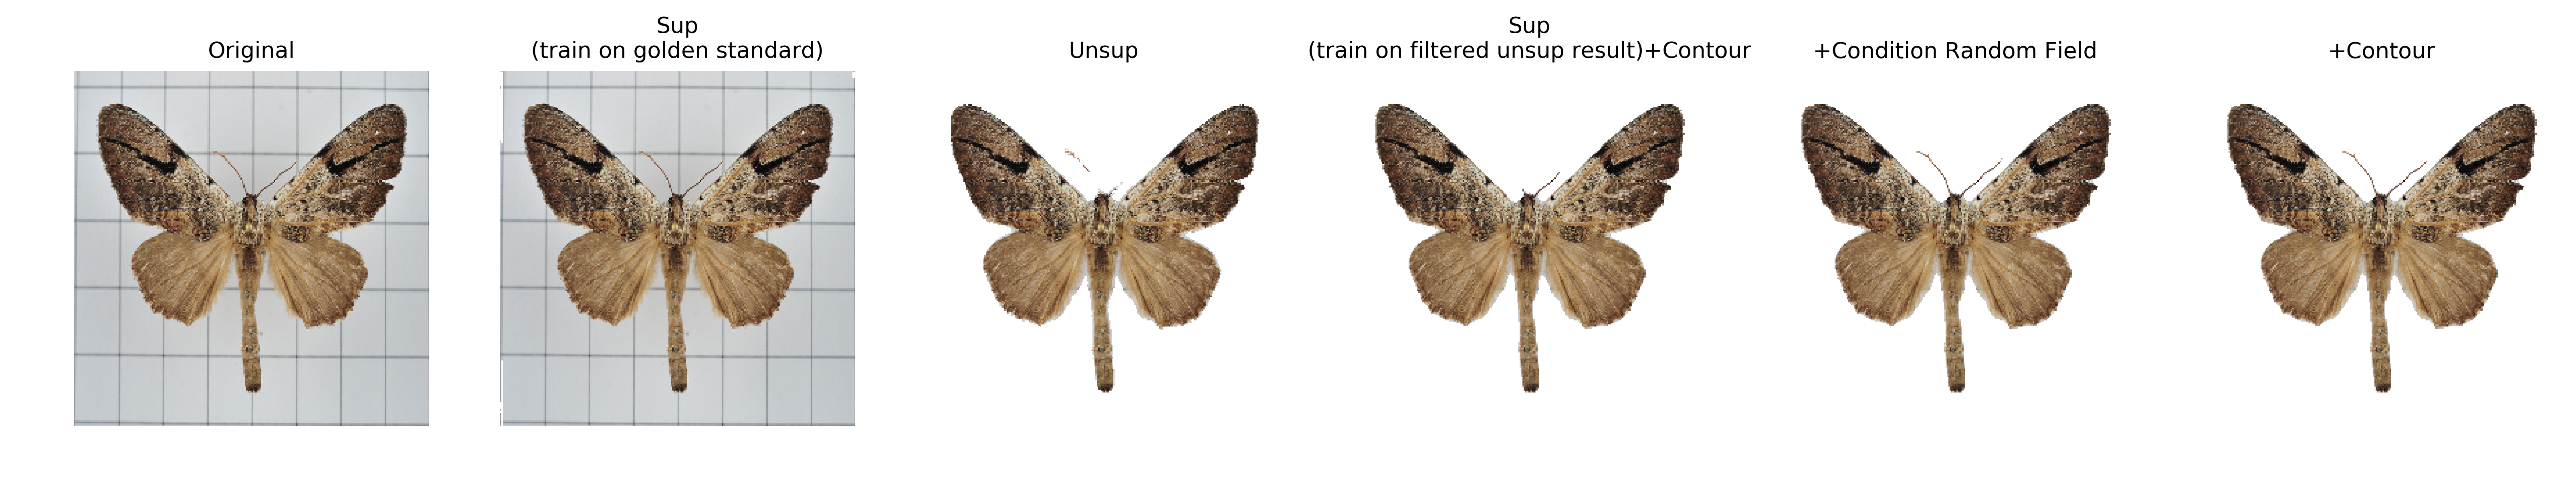

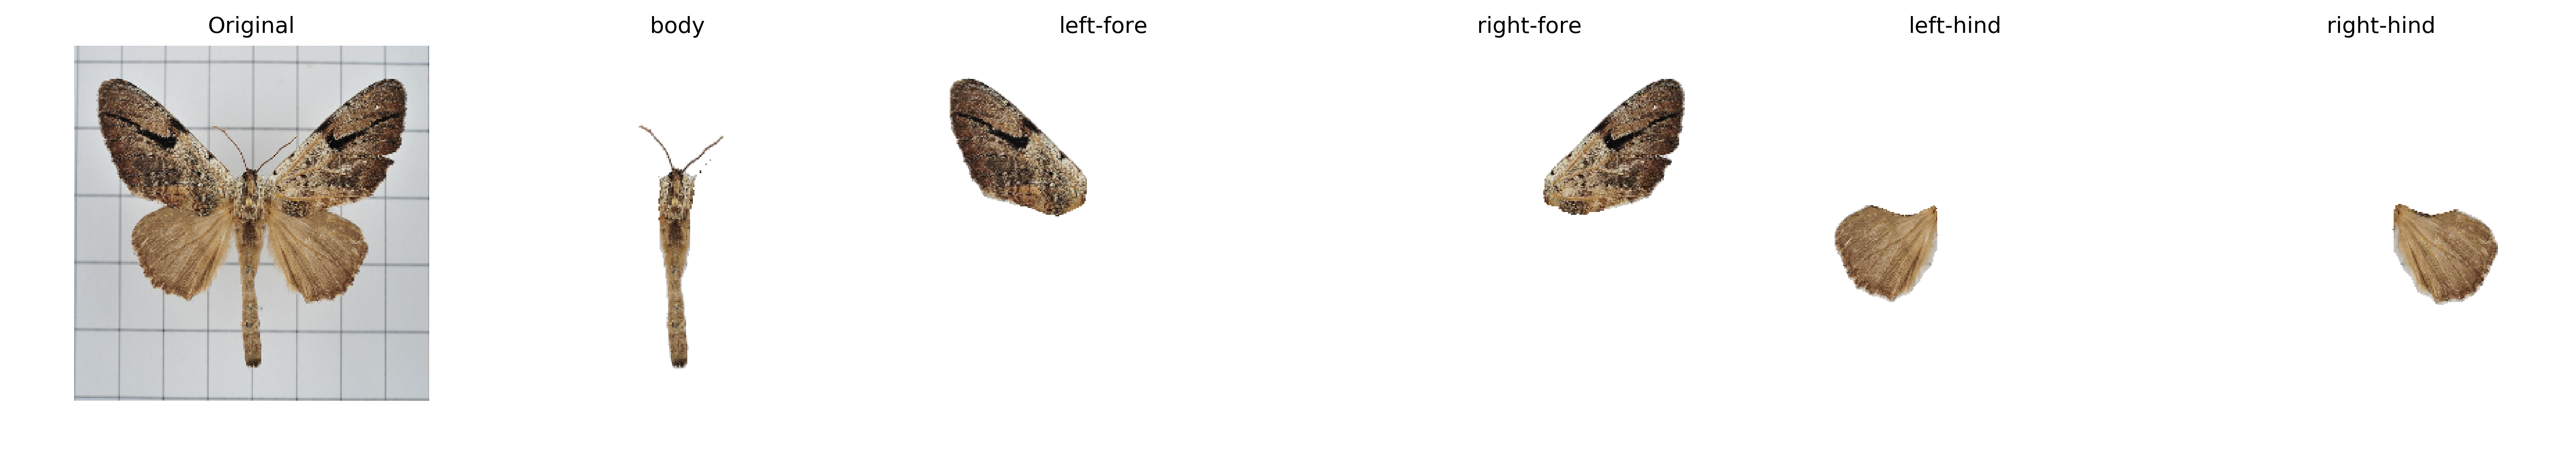

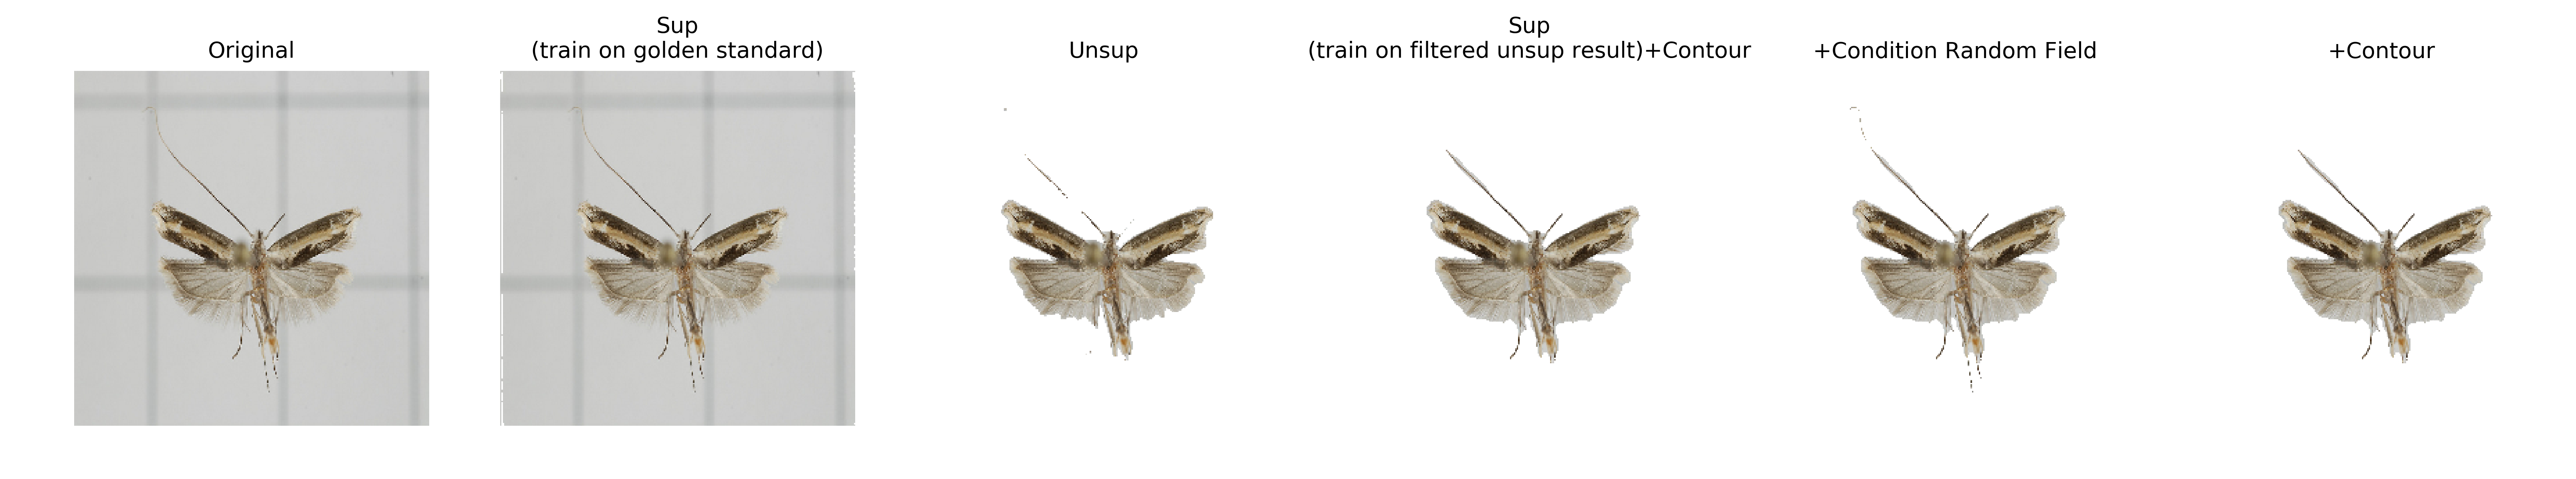

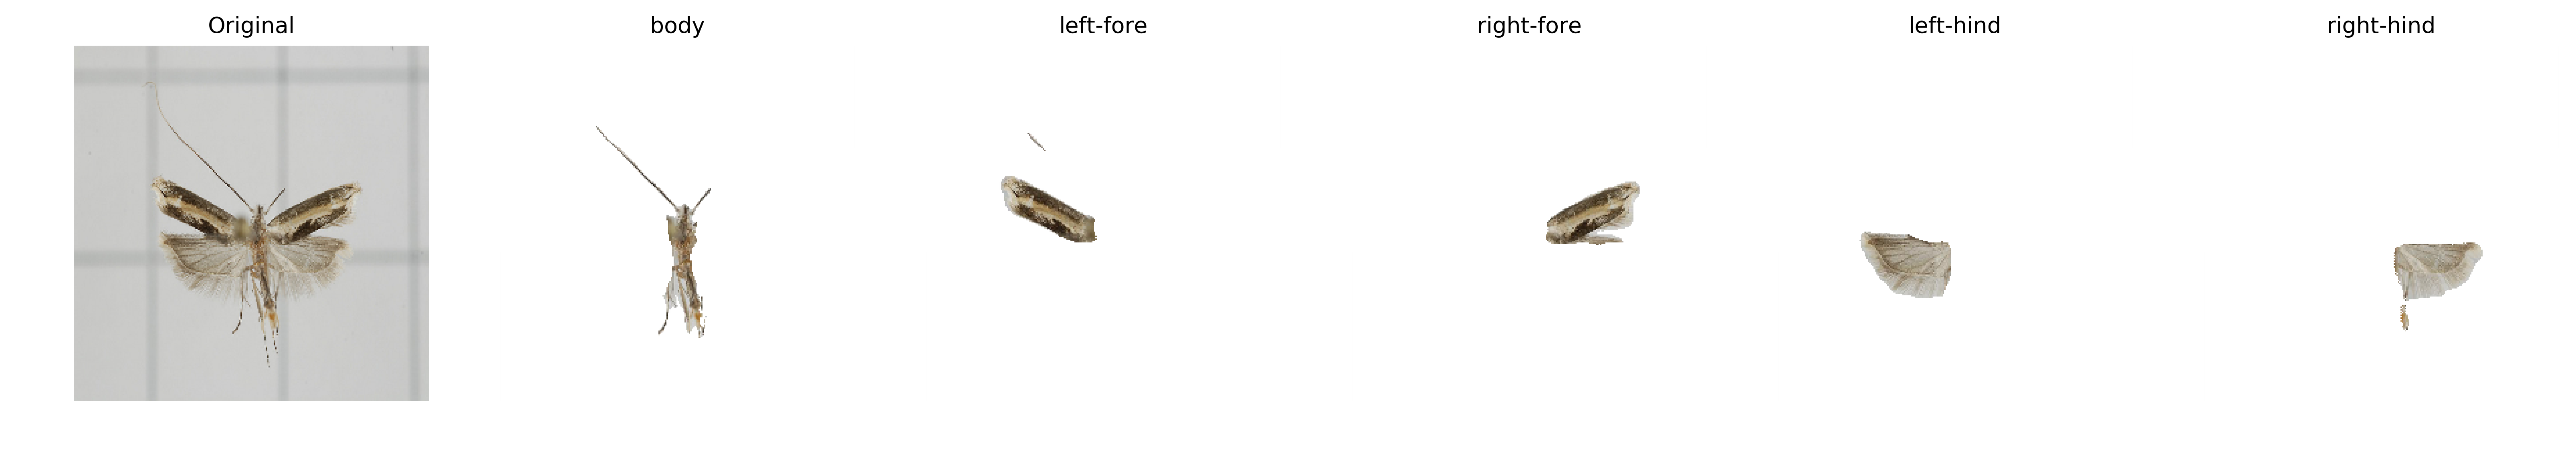

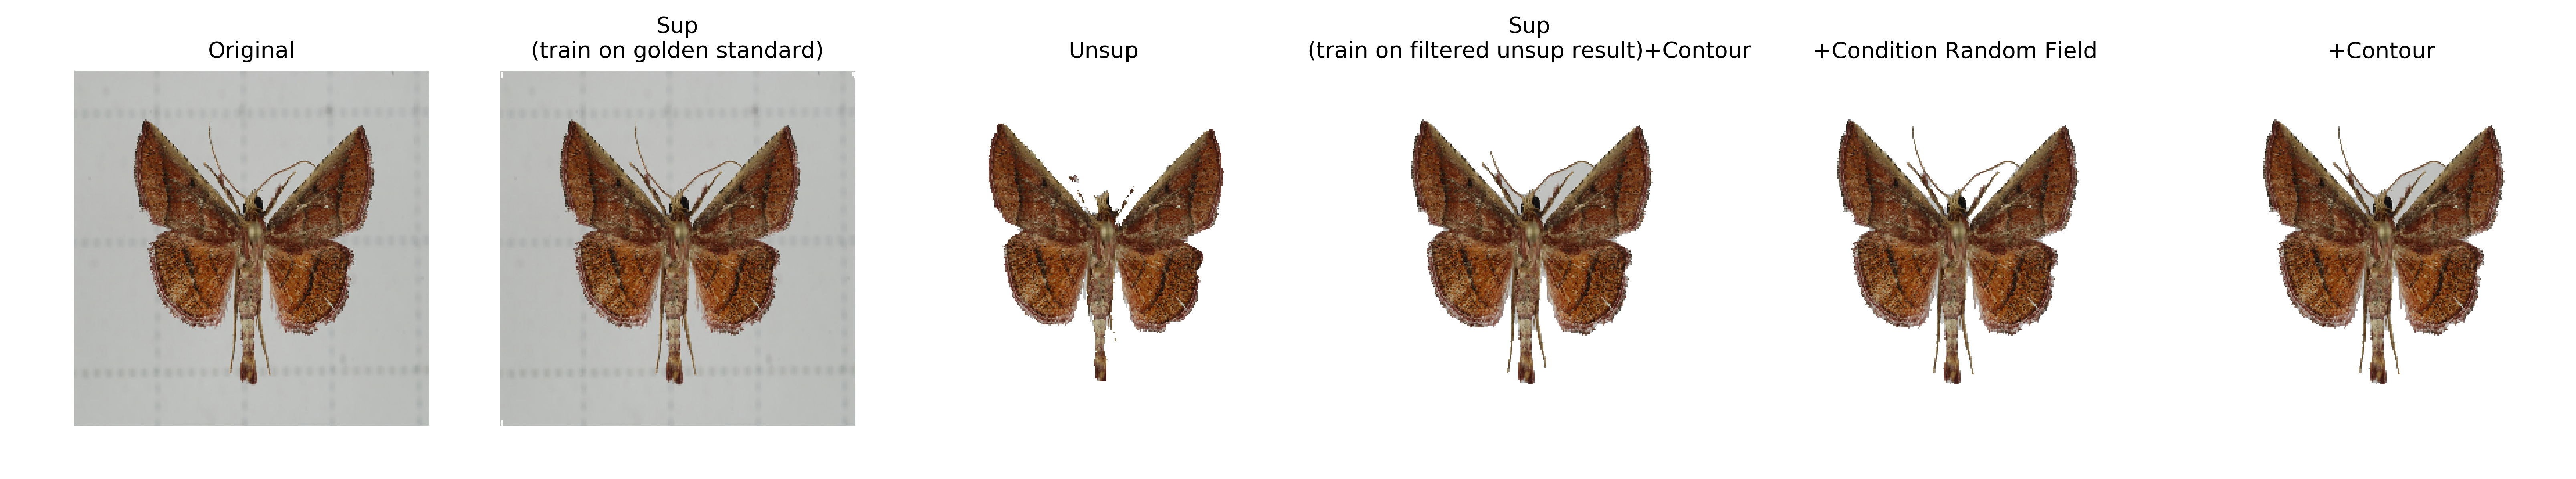

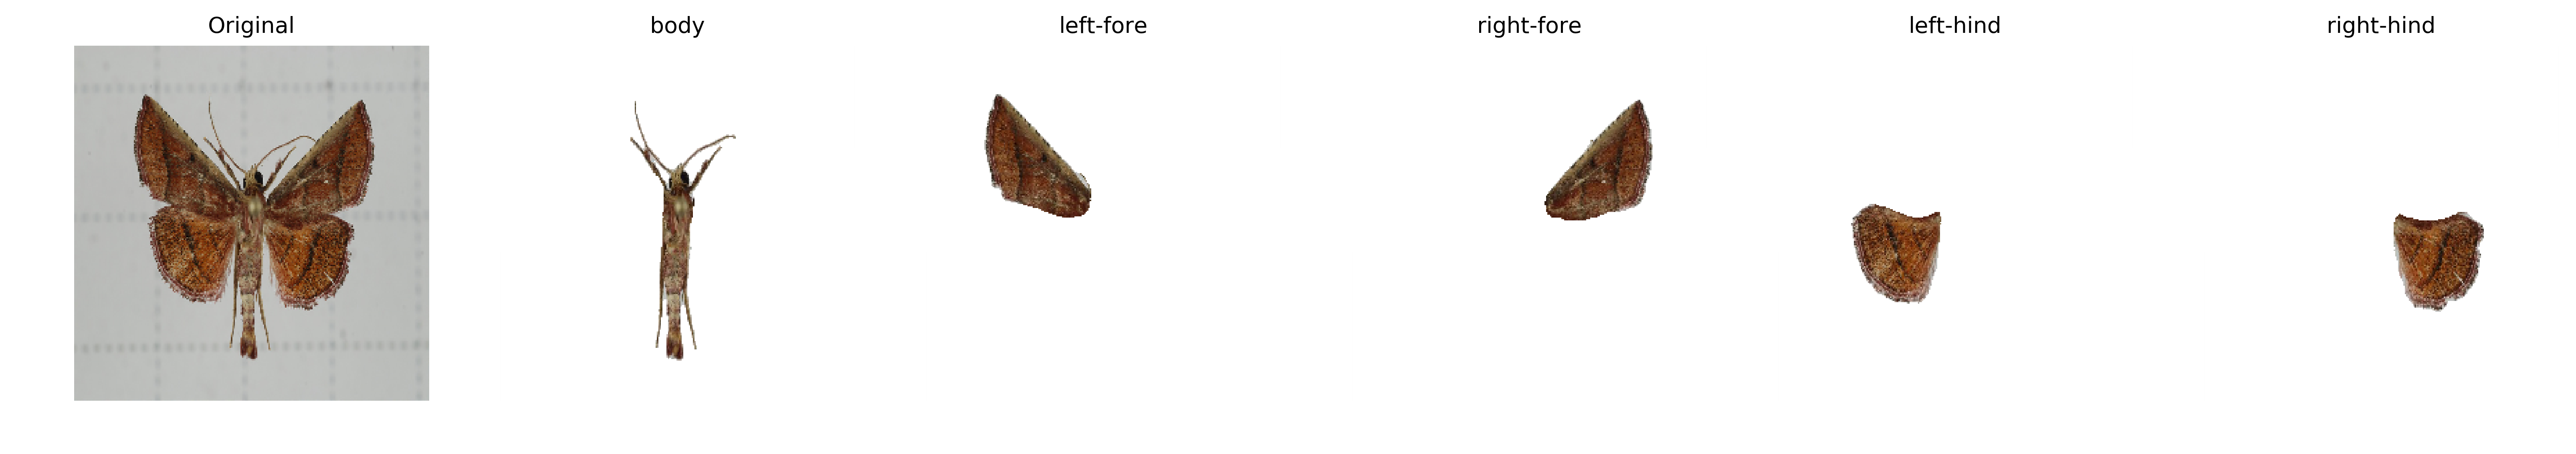

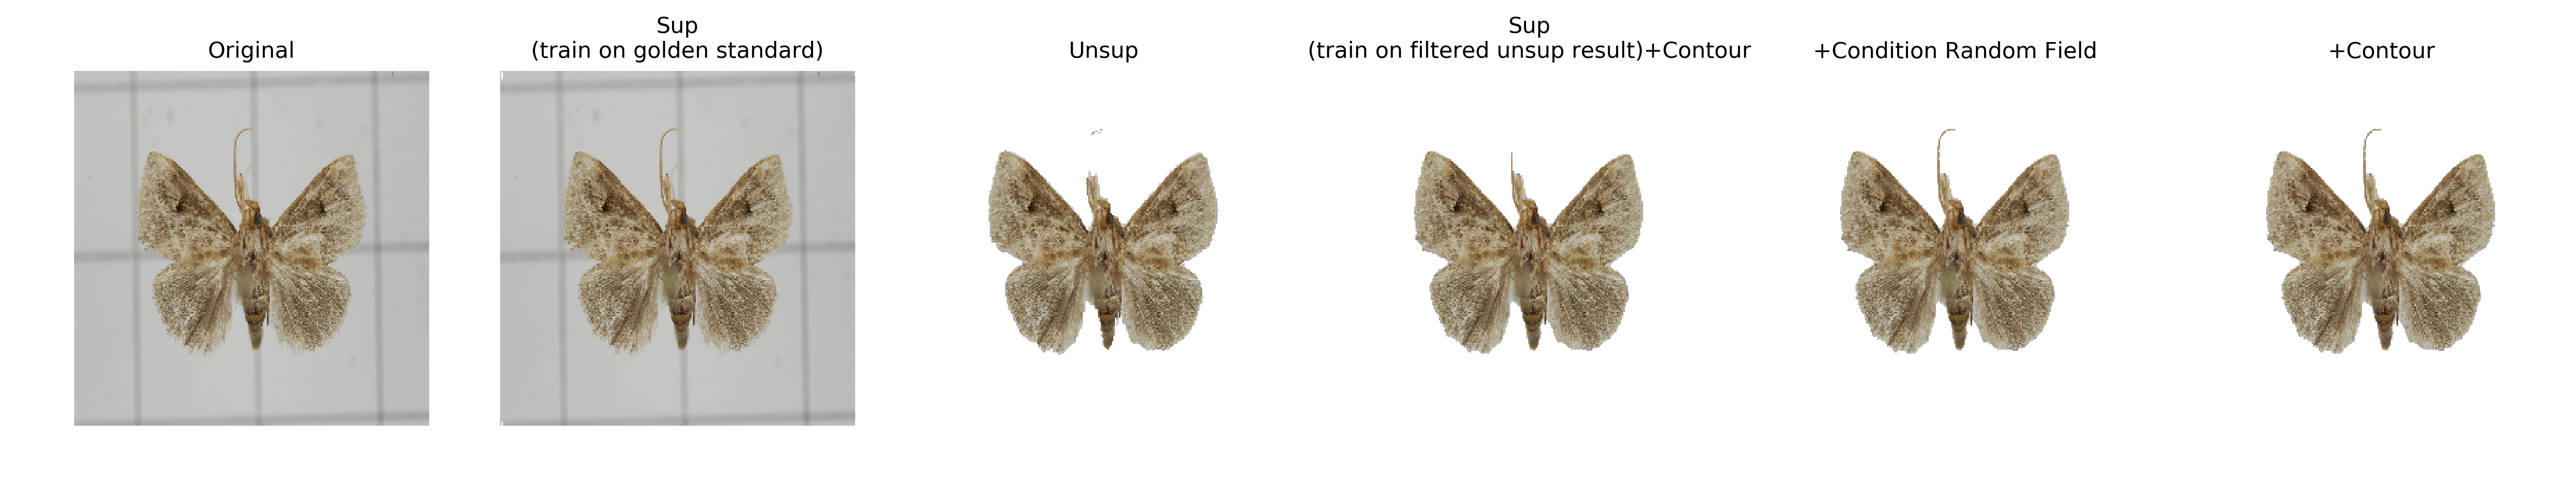

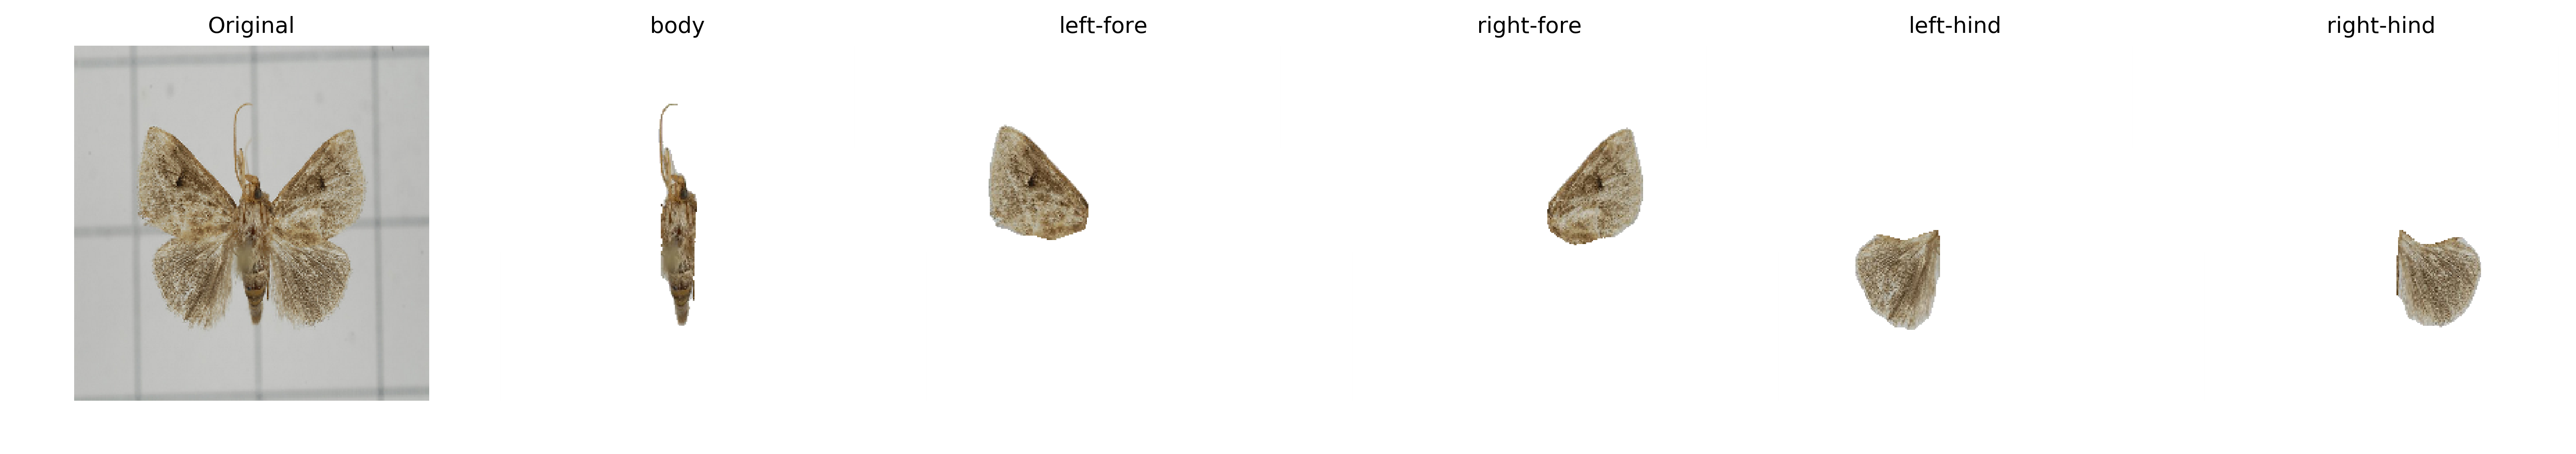

In [4]:
for i in range(len(sample_name)):
    path_list = [ori_path[i], sup_path[i], unsup_path[i], unsup2sup_path[i], _crf_path[i], _cv2_path[i]]
    img_list = [resize(io.imread(path), output_shape=(256,256)) for path in path_list]
    txt_list = ['Original', 'Sup\n(train on golden standard)', 
                'Unsup', 'Sup\n(train on filtered unsup result)+Contour', 
                '+Condition Random Field', '+Contour']
    path_list_pt = [ori_path[i], body_path[i], lf_path[i], rf_path[i], lh_path[i], rh_path[i]]
    img_list_pt  = [resize(io.imread(path), output_shape=(256,256)) for path in path_list_pt]
    txt_list_pt = ['Original', 'body', 'left-fore', 'right-fore', 'left-hind', 'right-hind']
    for ii in range(1,len(img_list)):
        if len(img_list[ii].shape)==2:
            mask = np.stack((img_list[ii],img_list[ii],img_list[ii]),axis=2)
            w_mask = 1-mask
        else:
            mask = img_list[ii]
            w_mask = 1-mask
        tmp = img_list[0]* mask
        tmp = tmp+w_mask
        img_list[ii] = tmp
    fig = plt_result(img_list, txt_list, fontsize = 10, show = True)
    fig = plt_result(img_list_pt, txt_list_pt, fontsize = 10, show = True)